## Find peaks

- https://github.com/ig248/pyampd
- https://github.com/ig248/pyampd/blob/master/notebooks/ampd.ipynb

Ran `LinesOverSphereGather.py` in Paraview on Nb5k image data time series

Want to find the peaks of intensity over radial lines from center of data set so maybe can produce a surface on those manifolds

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks_cwt
from pyampd.ampd import find_peaks, find_peaks_original, find_peaks_adaptive

In [2]:
df = pd.read_csv('data_pol_all.csv', sep=',', encoding='utf-8')
df.head()

,pointindex,intensity,px,py,pz,timestep,lineindex
0,0,0.0,0.000000,0.0,0.00000,0,0
1,1,0.0,0.000705,0.0,0.00495,0,0
2,2,0.0,0.001411,0.0,0.00990,0,0
3,3,0.0,0.002116,0.0,0.01485,0,0
4,4,0.0,0.002821,0.0,0.01980,0,0


### Finding Peaks: New vs Original

- `find_peaks()` always seems to find a "peak" at the end of the data set
- `find_peaks_original()` doesn't put a "peak" at the end
- Limiting `scale` seems to allow smaller peaks to be found, too, besides being faster

[22 54]


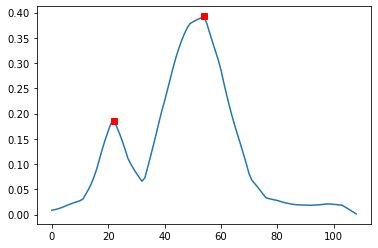

In [3]:
df1 = df.loc[(df['timestep']==20) & (df['lineindex']==45),['pointindex','intensity']]

t = df1['pointindex'].values
x = df1['intensity'].values
pks = find_peaks_original(x, scale=10)

print(pks)

plt.plot(t, x, '-')
plt.plot(t[pks], x[pks], 'rs')

[  0 108]


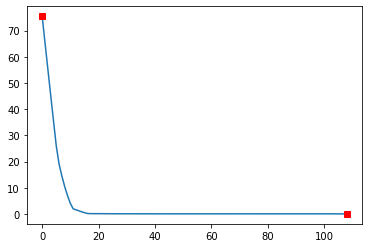

In [4]:
df1 = df.loc[(df['timestep']==1) & (df['lineindex']==45),['pointindex','intensity']]

t = df1['pointindex'].values
x = df1['intensity'].values
pks = find_peaks_adaptive(x, window=40)

print(pks)

plt.plot(t, x, '-')
plt.plot(t[pks], x[pks], 'rs')

In [5]:
import peakdetect


### Alternative method that seems to work fine and is slightly faster

[https://github.com/anaxilaus/peakdetect/blob/master/peakdetect/peakdetect.py]()

[[[9, 2.189372801881228]], [[5, 1.802096812947604]]]


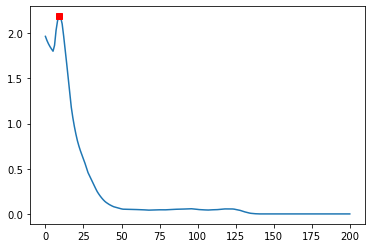

In [6]:
df1 = df.loc[(df['timestep']==6) & (df['lineindex']==30),['pointindex','intensity']]

t = df1['pointindex'].values
x = df1['intensity'].values
pos_neg_pks = peakdetect.peakdetect(x, lookahead=4, delta=0.05)

print(pos_neg_pks)

pks = [pp[0] for pp in pos_neg_pks[0]]

plt.plot(t, x, '-')
plt.plot(t[pks], x[pks], 'rs')

### Original seems slightly faster for our data

In [7]:
x = df.loc[(df['timestep']==20) & (df['lineindex']==45),'intensity'].values

In [8]:
%timeit find_peaks_original(x, scale=10)

480 µs ± 7.31 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [9]:
%timeit find_peaks(x, scale=10)

521 µs ± 4.86 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [10]:
%timeit find_peaks_adaptive(x, window=40)

718 µs ± 2.18 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [11]:
%timeit peakdetect.peakdetect(x, lookahead=3, delta=0.005)

214 µs ± 1.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Loop through all

In [12]:
timesteps = df['timestep'].unique().tolist()
print(timesteps)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]


In [13]:
lines = df['lineindex'].unique().tolist()
print(lines)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


### Prepare to find all peaks

First set the index for faster lookup

In [14]:
df_nopts = df[['timestep','lineindex','pointindex','intensity']].copy()

In [15]:
df_intensities = df_nopts.set_index(keys=['timestep','lineindex'])
df_intensities.head()

pointindex  intensity
timestep lineindex                       
0        0                   0        0.0
         0                   1        0.0
         0                   2        0.0
         0                   3        0.0
         0                   4        0.0

In [16]:
df_intensities2 = df_nopts.set_index(keys=['timestep','lineindex','pointindex'])
df_intensities2.head()

intensity
timestep lineindex pointindex           
0        0         0                 0.0
                   1                 0.0
                   2                 0.0
                   3                 0.0
                   4                 0.0

#### Trying a couple methods for combining columns into a tuple

to try out multi-index vs unique tuple index speed

**Turns out that it's really recommended to use a multi-index rather than tuples for an index**

In [17]:
%timeit df[['timestep','lineindex']].apply(tuple, axis=1)

8.73 s ± 65.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
%timeit list(zip(df['timestep'], df['lineindex'],df['pointindex']))

347 ms ± 19.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
list(zip(df['timestep'], df['lineindex'],df['pointindex']))[:10]

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 0, 8),
 (0, 0, 9)]

#### Lookup speed

In [20]:
%timeit df_intensities.loc[(20,0),:]

7.09 ms ± 734 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [21]:
%timeit df_intensities2.loc[(20,0),:]

7.24 ms ± 2.43 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [22]:
idx = pd.IndexSlice
%timeit df_intensities2.loc[idx[20,0,:],:]

10.5 ms ± 693 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [23]:
%timeit df_intensities2.loc[(20,0,1),:]

239 µs ± 1.39 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [24]:
%timeit df_intensities2.loc[(20,0,[0,1,2]),:]

13.9 ms ± 801 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [25]:
%timeit df_intensities2.loc[[(20,0,0),(20,0,1),(20,0,2)],:]

5.71 ms ± 236 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [26]:
%timeit df_intensities2.loc[(20,0,0):(20,0,20),:]

6.53 ms ± 980 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [27]:
%timeit [df_intensities2.loc[xx,:] for xx in list(zip([20]*100,[0]*100,range(101)))]

23.9 ms ± 72.6 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [28]:
df_intensities2.loc[(20,0),'intensity'].values

array([8.80729155e-03, 1.04131678e-02, 1.20849205e-02, 1.38225495e-02,
       1.56260549e-02, 1.74954367e-02, 1.94306949e-02, 2.14318303e-02,
       2.34988406e-02, 2.56317286e-02, 2.78304916e-02, 4.29184172e-02,
       5.91531198e-02, 7.50746612e-02, 9.06830291e-02, 1.05978201e-01,
       1.20960222e-01, 1.35629069e-01, 1.49984744e-01, 1.64027223e-01,
       1.77756551e-01, 1.72568432e-01, 1.62916617e-01, 1.53573917e-01,
       1.44540309e-01, 1.35815801e-01, 1.27400397e-01, 1.19294095e-01,
       1.11496897e-01, 1.04008824e-01, 9.68298300e-02, 1.07018263e-01,
       1.24558190e-01, 1.41966082e-01, 1.59241938e-01, 1.76385759e-01,
       1.93390081e-01, 2.10619395e-01, 2.28183378e-01, 2.46081980e-01,
       2.64315198e-01, 2.81702526e-01, 2.97856031e-01, 3.13381602e-01,
       3.28279239e-01, 3.42548900e-01, 3.56190668e-01, 3.69204507e-01,
       3.81590415e-01, 3.93348380e-01, 4.04478421e-01, 3.91685111e-01,
       3.55367523e-01, 3.19592432e-01, 2.84359422e-01, 2.49668915e-01,
      

---

## Actually find all peaks

53 sec on desktop machine

Trying just keeping all data in the DataFrame, then looking up point and storing right after doing peak finding.

In [29]:
df_mi = df.set_index(keys=['timestep','lineindex','pointindex'])

#### Note that just giving a couple levels of a multi-index removes them in return

In [30]:
idx = pd.IndexSlice
df_mi.loc[(2,38),:]

,intensity,px,py,pz
pointindex,,,,
0,127.016366,0.000000,0.000000,0.00000
1,130.054485,-0.004845,-0.000449,0.00115
2,132.617029,-0.009690,-0.000898,0.00230
3,134.717897,-0.014536,-0.001347,0.00345
4,136.370983,-0.019381,-0.001796,0.00460
...,...,...,...,...
196,0.000000,-0.949657,-0.088014,0.22540
197,0.000000,-0.954502,-0.088463,0.22655
198,0.000000,-0.959347,-0.088912,0.22770


#### For some reason IndexSlice keeps the multi-index in place after selection!

As seen above, this is slightly slower, but it's useful here for me to retain all data

https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html

In [49]:
%timeit df_mi.loc[idx[25,80,:],:]

10.9 ms ± 788 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [50]:
%timeit df_mi.loc[idx[25,:,:],:]

8.78 ms ± 77.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [52]:
df_mi_25 = df_mi.loc[(25,),:]
%timeit df_mi_25.loc[idx[80,:],:]

712 µs ± 5.98 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [31]:
idx = pd.IndexSlice
df_mi.loc[idx[2,38,:],:]

intensity        px        py       pz
timestep lineindex pointindex                                         
2        38        0           127.016366  0.000000  0.000000  0.00000
                   1           130.054485 -0.004845 -0.000449  0.00115
                   2           132.617029 -0.009690 -0.000898  0.00230
                   3           134.717897 -0.014536 -0.001347  0.00345
                   4           136.370983 -0.019381 -0.001796  0.00460
...                                   ...       ...       ...      ...
                   196           0.000000 -0.949657 -0.088014  0.22540
                   197           0.000000 -0.954502 -0.088463  0.22655
                   198           0.000000 -0.959347 -0.088912  0.22770
                   199           0.000000 -0.964193 -0.089361  0.22885
                   200           0.000000 -0.969038 -0.089810  0.23000

[201 rows x 4 columns]

#### Could have compiled list of lists for final DataFrame

But if possible I always want to avoid relying on column order and would instead rather access items by name to make sure there aren't any indexing mistakes.

*Takes about 65 sec on desktop...*

In [36]:
idx = pd.IndexSlice

peaks_dict = {'timestep':[],
              'lineindex':[],
              'pointindex':[],
              'peakindex':[],
              'intensity':[],
              'px':[], 'py':[], 'pz':[]}
for ts in timesteps[1:]:
    for ln in lines:
        df_subset = df_mi.loc[idx[ts,ln,:],:]
        x = df_subset['intensity'].values
        pos_neg_pks = peakdetect.peakdetect(x, lookahead=4, delta=0.05)

        # Result are returned as a list of pos,neg peaks, each with index,intensity
        pks = [pp[0] for pp in pos_neg_pks[0]]
        
        for pk_idx,pk in enumerate(pks):
            # indexing into df_subset loses index values...
            pt_dict = df_subset.loc[(ts,ln,pk),:].to_dict()
            peaks_dict['timestep'].append(ts)
            peaks_dict['lineindex'].append(ln)
            peaks_dict['pointindex'].append(pk)
            peaks_dict['peakindex'].append(pk_idx)
            for k,v in pt_dict.items():
                peaks_dict[k].append(v)

df_peaks = pd.DataFrame(peaks_dict)
df_peaks.head(20)

,timestep,lineindex,pointindex,peakindex,intensity,px,py,pz
0,2,38,5,0,137.590190,-0.024226,-0.002245,0.00575
1,2,46,5,0,137.988263,-0.022536,-0.010680,0.00175
2,2,51,5,0,143.930799,-0.024797,0.003090,-0.00075
3,2,54,2,0,129.948551,-0.006991,-0.007094,-0.00090
4,2,59,5,0,136.482308,-0.023920,-0.005504,-0.00475
5,3,38,5,0,172.449343,-0.024226,-0.002245,0.00575
6,3,46,3,0,170.189309,-0.013522,-0.006408,0.00105
7,3,51,5,0,180.183359,-0.024797,0.003090,-0.00075
8,3,59,4,0,170.110353,-0.019136,-0.004403,-0.00380
9,4,38,5,0,68.465367,-0.024226,-0.002245,0.00575


### Now need to turn this into a real VTK structure of points over time...

Try Unstructured Grid from https://pypi.org/project/uvw/

In [37]:
from uvw import UnstructuredGrid, DataArray
from uvw.unstructured import CellType

#### Want one file per timestep

In [38]:
pts = df_peaks.set_index(keys='timestep')
pts.head(10)

,lineindex,pointindex,peakindex,intensity,px,py,pz
timestep,,,,,,,
2,38,5,0,137.590190,-0.024226,-0.002245,0.00575
2,46,5,0,137.988263,-0.022536,-0.010680,0.00175
2,51,5,0,143.930799,-0.024797,0.003090,-0.00075
2,54,2,0,129.948551,-0.006991,-0.007094,-0.00090
2,59,5,0,136.482308,-0.023920,-0.005504,-0.00475
3,38,5,0,172.449343,-0.024226,-0.002245,0.00575
3,46,3,0,170.189309,-0.013522,-0.006408,0.00105
3,51,5,0,180.183359,-0.024797,0.003090,-0.00075
3,59,4,0,170.110353,-0.019136,-0.004403,-0.00380


In [43]:
set(pts.columns.tolist())-set(['px', 'py', 'pz'])

{'intensity', 'lineindex', 'peakindex', 'pointindex'}

In [46]:
for ts in pts.index.unique().tolist():
    df_subset = pts.loc[ts,:]
    nodes = df_subset[['px','py','pz']].to_numpy()
    if nodes.ndim == 1:
        nodes = np.expand_dims(nodes,0)
    n_pts = nodes.shape[0]

    # vertex node connectivity needs to be like list of single element lists
    connectivity = {
        CellType.POLY_VERTEX: np.arange(n_pts).reshape(-1,1)
    }

    f = UnstructuredGrid('./Ugrid/ugrid_' + str(ts).zfill(2) + '.vtu', nodes, connectivity)
    
    for col in (set(pts.columns.tolist())-set(['px', 'py', 'pz'])):
        if n_pts == 1:
            data_array = np.array([df_subset[col]])
        else:
            data_array = df_subset[col].to_numpy()
        f.addPointData(DataArray(data_array, range(1), col))
    f.write()

### Need to go back and preserve intensities so can maybe threshold points